In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Ściągnij bazę danych iris2D.csv (jest to 150 irysów skompresowanych przez PCA do dwóch wymiarów)

 i przetestuj na niej grupowanie metodą k-średnich, przyjmując k=3.
 
  Zwizualizuj klastry na wykresie punktowym. Każdy irys to punkt, a różne klastry mają różne kolory.

In [15]:

# Import danych i sprawdzenie czy sa braki
df = pd.read_csv('data/iris2D.csv')
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     150 non-null    float64
 1   PC2     150 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


((150, 2), None)

In [16]:
df.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


/Users/aleksandermisztal/Desktop/PORT/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


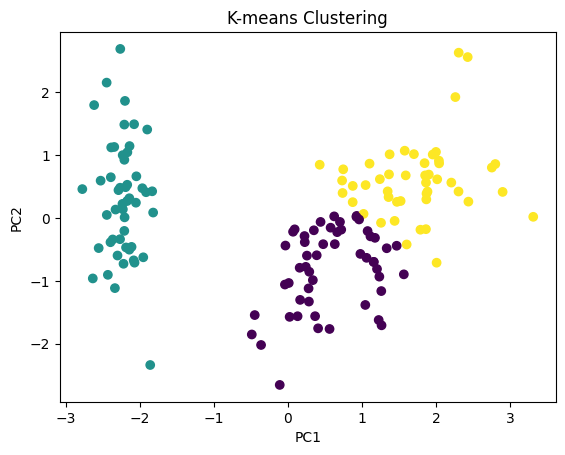

In [17]:
# Wybierz cechy do wykorzystania w klastrowaniu
features = df[['PC1', 'PC2']]

# Utwórz obiekt KMeans i dopasuj DataFrame
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

# Uzyskaj etykiety klastrów dla każdego punktu w DataFrame
labels = kmeans.labels_

# Dodaj etykiety klastrów do DataFrame
df['Cluster'] = labels

# Wyświetl wykres klastrów
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()


Podobnie jak w poprzednim zadaniu, przetestuj jak działa algorytm grupowania opartego na gęstości: DBSCAN. 

Poeksperymentuj z doborem parametrów algorytmu. Powstałe klastry przedstaw na wykresie punktowym.

Wyjaśnij w kilku zdaniach ogólną ideę działania algorytmu.

In [18]:
from sklearn.cluster import DBSCAN

# DBSCAN using sample parameters

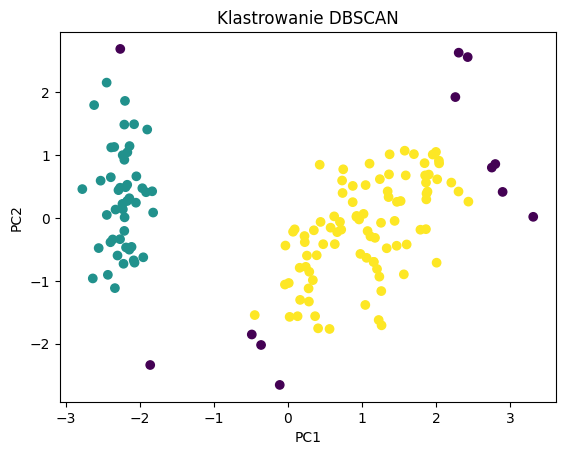

In [19]:
# Wybierz cechy, które będą używane do klasteryzacji
features = df[['PC1', 'PC2']]

# Stwórz obiekt DBSCAN i dopasuj dane
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Dostosuj parametry zgodnie z danymi
dbscan.fit(features)

# Pobierz etykiety klastrów dla każdego punktu danych
labels = dbscan.labels_

# Dodaj etykiety klastrów do DataFrame
df['Cluster'] = labels

# Wykres klastrów
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Klastrowanie DBSCAN')
plt.show()


# DBSCAN after tuning

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

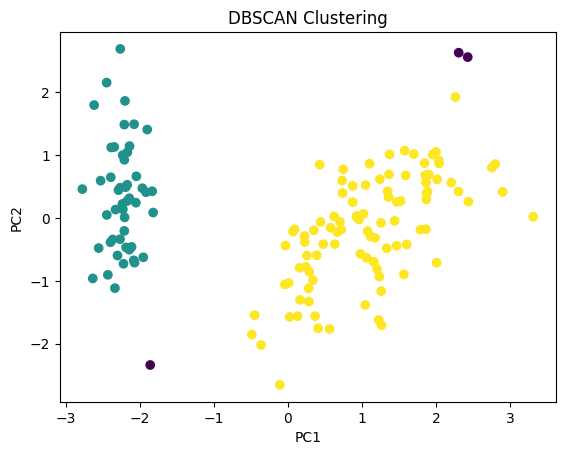

Najlepsza kombinacja parametrów:
{'eps': 1.0, 'min_samples': 7}
Najlepsza wartość silhouette score: 0.5722013605630372


In [21]:
# Zdefiniuj siatkę parametrów do znalezienia najlepszej kombinacji
param_grid = {
    'eps': [0.1, 0.3, 0.5, 0.7, 1.0],
    'min_samples': [2, 3, 5, 7, 10]
}

best_score = -1
best_params = None

# Iteruj po kombinacjach parametrów
for params in ParameterGrid(param_grid):
    # Utwórz obiekt DBSCAN i dopasuj dane
    dbscan = DBSCAN(**params)
    dbscan.fit(features)

    # Uzyskaj etykiety klastrów dla każdego punktu danych
    labels = dbscan.labels_

    # Oblicz wartość silhouette score
    try:
        score = silhouette_score(features, labels)
    except ValueError:
        # Pomijaj kombinację parametrów, jeśli nie można obliczyć silhouette score
        continue

    # Sprawdź, czy ta kombinacja parametrów jest najlepsza dotychczas
    if score > best_score:
        best_score = score
        best_params = params
        best_labels = labels

# Przypisz najlepsze etykiety klastrów do DataFrame
df['Cluster'] = best_labels

# Wyświetl wykres klastrów
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show()

# Wyświetl najlepszą znalezioną kombinację parametrów
print("Najlepsza kombinacja parametrów:")
print(best_params)
print("Najlepsza wartość silhouette score:", best_score)


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to algorytm grupowania oparty na gęstości danych. 

Jego główna idea polega na grupowaniu punktów danych, które są gęsto rozłożone w przestrzeni cech, jednocześnie identyfikując odstępstwa jako szum. 

Algorytm rozpoczyna się od wyboru losowego, nieodwiedzonego punktu danych i tworzy wokół niego skupisko (klaster), znajdując inne punkty sąsiadujące w określonym promieniu. 

Ten proces jest rekurencyjnie powtarzany dla sąsiadujących punktów, tworząc klaster. Punkty, które nie są osiągalne z żadnego klastera, są oznaczane jako szum. 

Algorytm nie wymaga wcześniejszego określenia liczby klastrów i może obsługiwać klastry o dowolnych kształtach i rozmiarach.


Indeks Randa (Rand score) i macierz kontyngencji są metrykami oceny algorytmów grupowania. 

Indeks Randa porównuje przyporządkowania próbek do klastrów w prawdziwych i przewidywanych etykietach. 

Mierzy podobieństwo między grupowaniami, uwzględniając dopasowane klastry i niezgodności w przyporządkowaniu próbek.

 Macierz kontyngencji to tabela przedstawiająca liczbę próbek przyporządkowanych do kombinacji etykiet. 
 
 Analiza macierzy kontyngencji pozwala ocenić jakość grupowania, identyfikując wzorce w rozkładzie próbek. 
 
 Obydwie metryki są pomocne przy porównywaniu algorytmów i ocenie skuteczności grupowania.

In [22]:
df = pd.read_csv('data/irisORG.csv')
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


((150, 5), None)

In [23]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 4.1 KMEANS

/Users/aleksandermisztal/Desktop/PORT/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


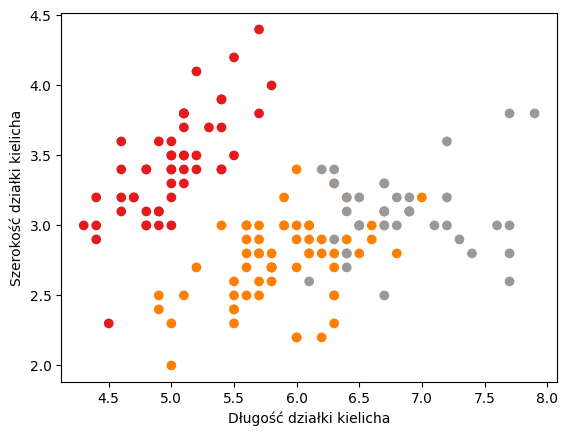

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Wczytaj plik CSV
df = pd.read_csv('data/irisORG.csv')

# Wybierz cechy do klastryzacji
features = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

# Wykonaj klastrowanie za pomocą k-means
kmeans = KMeans(n_clusters=3)  # Zakładając 3 klastry
kmeans.fit(features)
labels = kmeans.labels_

# Dodaj etykiety klastrów do ramki danych
df['cluster'] = labels

# Stwórz mapę kolorów dla klastrów
colormap = plt.cm.Set1

# Wykres klastrów
plt.scatter(features['sepal.length'], features['sepal.width'], c=labels, cmap=colormap)
plt.xlabel('Długość działki kielicha')
plt.ylabel('Szerokość działki kielicha')

plt.show()


- Klastry oznaczone jako 0 mają wszystkie próbki przypisane do drugiej prawdziwej etykiety, co sugeruje dobrze zidentyfikowane wzorce dla tej klasy.
- Klastry oznaczone jako 1 mają większość próbek przypisanych do pierwszej prawdziwej etykiety, ale także kilka próbek przypisanych do trzeciej prawdziwej etykiety. Istnieje pewna niejednoznaczność lub nakładanie się cech dla tej klasy.
- Klastry oznaczone jako 2 mają większość próbek przypisanych do trzeciej prawdziwej etykiety, ale także kilka próbek przypisanych do pierwszej prawdziwej etykiety. Podobnie jak w przypadku klastra 1, istnieje pewna niejednoznaczność lub nakładanie się cech dla tej klasy.

Rand Score wynosi 0.730, co wskazuje na umiarkowane porozumienie między przypisanymi klastrami a prawdziwymi etykietami. 
Oznacza to, że klastry mają pewną zgodność z rzeczywistym podziałem danych, choć mogą istnieć pewne niezgodności.

### 4.2 DBSCAN

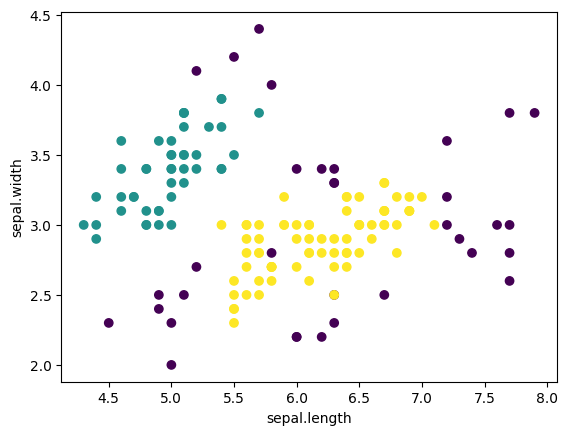

Macierz Kontyngencji:
[[ 5 11 18]
 [45  0  0]
 [ 0 39 32]]
Rand Score: 0.7475615212527964


In [13]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import rand_score

# Wczytaj dane z pliku CSV do obiektu DataFrame
df = pd.read_csv('data/irisORG.csv')

# Wybierz cechy, których chcesz użyć do klastryzacji
features = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

# Standaryzuj cechy przy użyciu StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Stwórz obiekt DBSCAN i dopasuj go do przeskalowanych danych
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)

# Pobierz przypisane etykiety od DBSCAN
labels = dbscan.labels_

# Dodaj etykiety do DataFrame
df['cluster'] = labels

# Wyświetl klastry na wykresie
plt.scatter(df['sepal.length'], df['sepal.width'], c=df['cluster'])
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.show()

# Oblicz macierz kontyngencji
cont_matrix = contingency_matrix(df['cluster'], df['variety'])
print("Macierz Kontyngencji:")
print(cont_matrix)

# Oblicz Rand Score
rand_score_value = rand_score(df['cluster'], df['variety'])
print("Rand Score:", rand_score_value)


- Klastry oznaczone jako 0 mają rozproszone przypisanie próbek do różnych prawdziwych etykiet, co sugeruje brak wyraźnych wzorców lub nakładanie się cech w danych.
- Klastry oznaczone jako 1 mają jednoznaczne przypisanie wszystkich próbek do pierwszej prawdziwej etykiety, co wskazuje na wykrycie specyficznych cech tej klasy.
- Klastry oznaczone jako 2 mają przypisanie głównie do drugiej prawdziwej etykiety, co może wskazywać na podobieństwo lub nakładanie się cech z tą klasą.

Rand Score wynosi 0.747, co oznacza umiarkowane porozumienie między klastrami a prawdziwymi etykietami, ale może istnieć pewne niezgodności.

W skrócie, analiza klastrów wskazuje na pewne wzorce i zgodność z prawdziwymi etykietami, ale również na obecność mieszanych cech i niejednoznaczności w przypisaniach.